# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

In [1]:
import pandas as pd
import warnings
import xlrd
import sys
from pandas.plotting import register_matplotlib_converters
import numpy as np
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import seaborn as sea

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['font.sans-serif']=['SimHei']
rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='once')

In [2]:
data=pd.read_csv('tq_past_load.csv',encoding="gb18030")

data.head()

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tqlx,tqmc,bs,2017/6/1,2017/6/8,2017/6/15,2017/6/22,2017/6/29,2017/7/6,2017/7/13,...,2019/3/21,2019/3/28,2019/4/4,2019/4/11,2019/4/18,2019/4/25,2019/5/2,2019/5/9,2019/5/16,2019/5/23
0,2,NaN,1001444521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2,NaN,1002035530,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,NaN,1002780124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2,NaN,1000006214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,1002156190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.862,8.9788,9.9228,7.932,8.6144,6.9024,8.8588,7.6692,8.2404,9.9224


In [3]:
# 删除含有负值和零值的行
datatemp=data.drop(columns=['tqlx','tqmc','bs'])
droplist=[]
for i in range(len(datatemp.index)):
    if (datatemp.iloc[i].values<=np.array(0)).any():
        droplist.append(datatemp.iloc[i].name)
data=data.drop(labels=droplist)
data.head()

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


,tqlx,tqmc,bs,2017/6/1,2017/6/8,2017/6/15,2017/6/22,2017/6/29,2017/7/6,2017/7/13,...,2019/3/21,2019/3/28,2019/4/4,2019/4/11,2019/4/18,2019/4/25,2019/5/2,2019/5/9,2019/5/16,2019/5/23
4,2,NaN,1002156190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.862,8.9788,9.9228,7.932,8.6144,6.9024,8.8588,7.6692,8.2404,9.9224
11,2,欧阳佛莲,2222222223785607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.444,8.4040,9.8600,9.456,7.2040,9.4520,8.3400,7.7880,6.4520,6.1840
21,2,深圳市大众建设集团有限公司,2222222223885517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.588,48.6600,41.8520,61.724,49.5880,54.1200,60.5360,55.5960,63.2440,56.8080
36,1,#1皇庭世纪#1公变,2222222230117115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.1500,237.1000,452.9500,398.4000,469.6000,456.9000
37,1,#1皇庭世纪#2公变,2222222230122081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,201.5500,200.4500,343.9500,318.3500,371.7000,354.8000


In [4]:
# datatemp=data.drop(columns=['tqlx','tqmc','bs'])
# print((datatemp.index.isin([0])).size)
# datatemp[datatemp.index.isin([0])]

In [5]:
#每一行的空值用每一行的平均值来填充
# for row in data.index:
#     data.loc[row].fillna(data.loc[row].drop(['tqlx','tqmc','bs']).mean(),inplace=True)
# data.head()

In [6]:
#tqlx和tqmc在时间序列分析中暂时用不到，删除
data_time_series=data.drop(columns=['tqlx','tqmc'])
data_time_series.head()

,bs,2017/6/1,2017/6/8,2017/6/15,2017/6/22,2017/6/29,2017/7/6,2017/7/13,2017/7/20,2017/7/27,...,2019/3/21,2019/3/28,2019/4/4,2019/4/11,2019/4/18,2019/4/25,2019/5/2,2019/5/9,2019/5/16,2019/5/23
4,1002156190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.862,8.9788,9.9228,7.932,8.6144,6.9024,8.8588,7.6692,8.2404,9.9224
11,2222222223785607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.444,8.4040,9.8600,9.456,7.2040,9.4520,8.3400,7.7880,6.4520,6.1840
21,2222222223885517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.588,48.6600,41.8520,61.724,49.5880,54.1200,60.5360,55.5960,63.2440,56.8080
36,2222222230117115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.1500,237.1000,452.9500,398.4000,469.6000,456.9000
37,2222222230122081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,201.5500,200.4500,343.9500,318.3500,371.7000,354.8000


In [7]:
#转置
data_time_series.set_index('bs')
data_time_series=data_time_series.T
#把标识行设为列名
data_time_series.columns = data_time_series.iloc[0]
data_time_series.drop(index='bs',inplace=True)
data_time_series.head()

bs,1002156190,2222222223785607,2222222223885517,2222222230117115,2222222230122081,2222222230117114,2222222230122080,2222222230117113,2222222223656172,2222222223651269,...,2222222223695323,222222222840949,2222222223605328,2222222223785363,2222222230161941,2222222230092052,2222222223655754,2222222223475268,2222222223895336,2222222223785729
2017/6/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/6/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/6/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/6/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/6/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#将索引变为列，方便之后格式转换
data_time_series.index.names=['time_series']
data_time_series=data_time_series.reset_index()
data_time_series.head()

bs,time_series,1002156190,2222222223785607,2222222223885517,2222222230117115,2222222230122081,2222222230117114,2222222230122080,2222222230117113,2222222223656172,...,2222222223695323,222222222840949,2222222223605328,2222222223785363,2222222230161941,2222222230092052,2222222223655754,2222222223475268,2222222223895336,2222222223785729
0,2017/6/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/6/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/6/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/6/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/6/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reading as datetime format:

In [9]:
data_time_series.reset_index()
data_time_series.head()

bs,time_series,1002156190,2222222223785607,2222222223885517,2222222230117115,2222222230122081,2222222230117114,2222222230122080,2222222230117113,2222222223656172,...,2222222223695323,222222222840949,2222222223605328,2222222223785363,2222222230161941,2222222230092052,2222222223655754,2222222223475268,2222222223895336,2222222223785729
0,2017/6/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/6/8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/6/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/6/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/6/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#将含有时序数据的字段转化为datetime64格式
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
# dateparse('2017-08-01')
data_time_series['time_series'] = data_time_series['time_series'].apply(dateparse)
data_time_series.set_index('time_series',inplace=True)
data_time_series=data_time_series.apply(pd.to_numeric)
data_time_series.head()

bs,1002156190,2222222223785607,2222222223885517,2222222230117115,2222222230122081,2222222230117114,2222222230122080,2222222230117113,2222222223656172,2222222223651269,...,2222222223695323,222222222840949,2222222223605328,2222222223785363,2222222230161941,2222222230092052,2222222223655754,2222222223475268,2222222223895336,2222222223785729
time_series,,,,,,,,,,,,,,,,,,,,,
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#处理空值
data_time_series=data_time_series.fillna(method='backfill',axis='index')
data_time_series_dropna=data_time_series.dropna(axis='columns')
#去掉重复的台区（重复列）
data_time_series_dropna=data_time_series_dropna.T.drop_duplicates().T
data_time_series_dropna.index

DatetimeIndex(['2017-06-01', '2017-06-08', '2017-06-15', '2017-06-22',
               '2017-06-29', '2017-07-06', '2017-07-13', '2017-07-20',
               '2017-07-27', '2017-08-03',
               ...
               '2019-03-21', '2019-03-28', '2019-04-04', '2019-04-11',
               '2019-04-18', '2019-04-25', '2019-05-02', '2019-05-09',
               '2019-05-16', '2019-05-23'],
              dtype='datetime64[ns]', name='time_series', length=104, freq=None)

In [12]:
#粗筛出原始数据缺失值比较少的台区（其表现为填充空值操作后连续重复值较少）,保存为一个列表
drop_little_tq_index = data_time_series_dropna.T\
[data_time_series_dropna.T['2017-06-01']!=data_time_series_dropna.T['2017-08-03']].index.to_list()

In [13]:
print(data_time_series_dropna.columns.is_unique)
#打印列的重复次数
# List=data_time_series_dropna.columns.to_list()
# List_set = set(List) 
# for item in List_set:
#     if List.count(item)>1:
#         print("the %s has found %d" %(item,List.count(item)))

True


In [14]:
data_2017_max=pd.DataFrame(data_time_series_dropna['2017'].max(),columns=['2017'])
data_2018_max=pd.DataFrame(data_time_series_dropna['2018'].max(),columns=['2018'])
data_2019_max=pd.DataFrame(data_time_series_dropna['2019'].max(),columns=['2019'])

print(data_2017_max.head())

print(type(data_2017_max))
print(data_2017_max.head())
data_2017_max.index.is_unique

                      2017
bs                        
1002156190          6.4436
2222222223785607    7.0040
2222222223885517   22.0200
2222222230117115  230.1500
2222222230122081  201.5500
<class 'pandas.core.frame.DataFrame'>
                      2017
bs                        
1002156190          6.4436
2222222223785607    7.0040
2222222223885517   22.0200
2222222230117115  230.1500
2222222230122081  201.5500


True

In [15]:
bs_year_max=pd.concat([data_2017_max,data_2018_max,data_2019_max],axis=1,join='inner')
bs_year_max.index.is_unique

True

In [16]:
#粗筛出逐年增长的负荷数据
increase_tq_index = bs_year_max[(bs_year_max['2017']<bs_year_max['2018']) & (bs_year_max['2018']<bs_year_max['2019'])].index.to_list()

In [17]:
#打印出既是逐年增长也没有太多缺失值的台区
intersection_index = list(set(drop_little_tq_index).intersection(set(increase_tq_index)))
print(intersection_index)

['3001177233', 3002240003, '3001212593', 3001721861, '2222222227840963', 3002233356, 3002210830, 3001378843, 3002841116, 3002284572, '3000782561', 3001719325, 3002259488, '3001232949', 3002117157, '3001206205', 3001724970, 3001699372, 3002206771, '3001151526', 3002232888, 3002105913, 3001718846, 3002830913, '3001206359', 3001445956, '3001218440', '2222222223505376', 3001549897, '3000041450', 3001645130, 3002284617, 3001535566, 3002228816, 3002292305, 3001453138, 3002896471, 3001392216, 3002247769, 3002531416, 3002372188, 3002791517, '2222222223475223', '3001131307', 3001712743, 3001525864, '3000487653', 3001370219, 3002790510, '3001062320', 3002614385, 3002245746, 3002951282, 3001332851, 3001309812, 3001515634, 3001499252, 3002815611, 3001668733, 3002294915, 3001748617, 3002891916, 3002188943, 3001624207, '3000913085', 3001333395, 3001723540, '3001057580', '3000196722', 3002791574, 3001445528, 3001399448, '3001071353', '2222222223575340', 3001373859, 3001622692, '3000486831', 300166570

In [18]:
#convert to time series:
ts = data_time_series_dropna[3002232277]
ts.head()

time_series
2017-06-01    5.242
2017-06-08    5.242
2017-06-15    5.242
2017-06-22    5.242
2017-06-29    5.242
Name: 3002232277, dtype: float64

# 平稳性检验

## 展示时序图

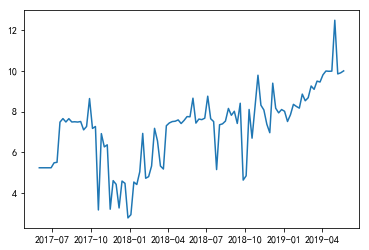

In [19]:
register_matplotlib_converters()
plt.plot(ts)

### 平稳性检验函数

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #移动平均和移动方差
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #把移动平均和移动方差画出来:
    orig = plt.plot(timeseries, color='blue',label='原始曲线')
    mean = plt.plot(rolmean, color='yellow', label='移动平均')
    std = plt.plot(rolstd, color='black', label = '移动方差')
    plt.legend(loc='best')
    plt.title(u'绘制移动平均数和移动方差，观察它是否随着时间变化')
    plt.show(block=False)
    
    #进行单位根检验:
    print('单位根检验:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput.loc['p-value']>0.01:
        print('p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的')
    else:
        print('p值小于0.01，拒绝原假设，说明时间序列是平稳的')
    return dfoutput.loc['p-value']<0.01
    #返回时间序列是否平稳的判断值
    '''
    单位根的原假设为序列具有单位根，即非平稳，
    对于一个平稳的时序数据，就需要在给定的置信水平上显著，拒绝原假设。
    '''

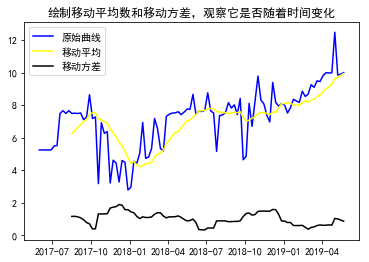

单位根检验:
Test Statistic                  -1.364978
p-value                          0.598946
#Lags Used                       3.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [21]:
test_stationarity(ts)

# 平稳性的处理


## 预测和消除趋势


## Smoothing:

### 移动平均

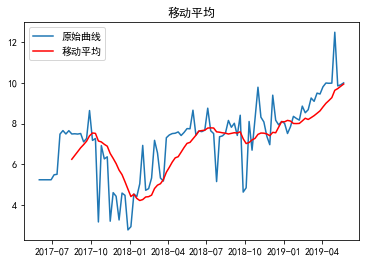

In [22]:
moving_avg = ts.rolling(12).mean()
plt.plot(ts,label='原始曲线')
plt.plot(moving_avg, color='red',label='移动平均')
plt.title('移动平均')
plt.legend(loc='best')
plt.show()

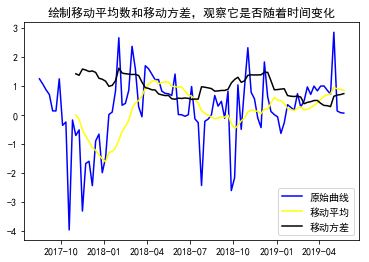

单位根检验:
Test Statistic                 -3.380865
p-value                         0.011629
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [23]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

### 指数平滑法

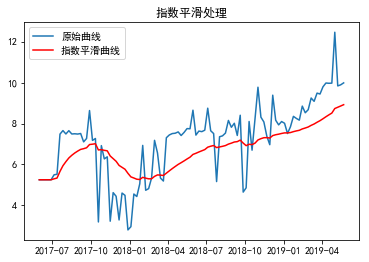

In [24]:
expwighted_avg = ts.ewm(halflife=12).mean()
plt.plot(ts,label='原始曲线')
plt.plot(expwighted_avg, color='red',label='指数平滑曲线')
plt.title('指数平滑处理')
plt.legend(loc='best')
plt.show()
#expwighted_avg.plot(style='k--')

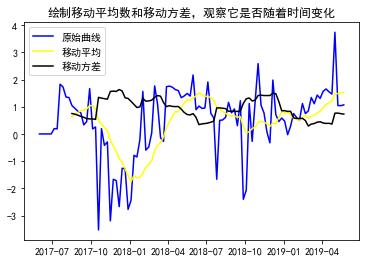

单位根检验:
Test Statistic                  -2.418685
p-value                          0.136532
#Lags Used                       3.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [25]:
ts_ewma_diff = ts - expwighted_avg
test_stationarity(ts_ewma_diff)

## 消除趋势和季节性

### 差分:

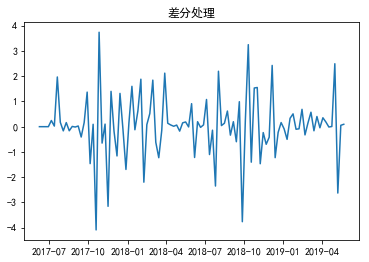

In [26]:
#直接对原始数据取一阶差分:
ts_diff = ts - ts.shift(1)
plt.plot(ts_diff)
plt.title('差分处理')
plt.show()

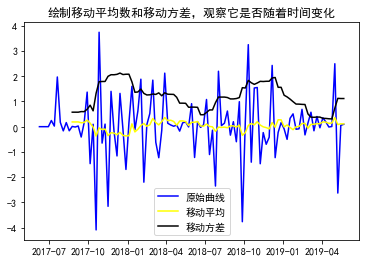

单位根检验:
Test Statistic                -8.614711e+00
p-value                        6.336207e-14
#Lags Used                     2.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64
p值小于0.01，拒绝原假设，说明时间序列是平稳的


True

In [27]:
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

# 构建模型

## 时间序列的分解（分解后分开预测）

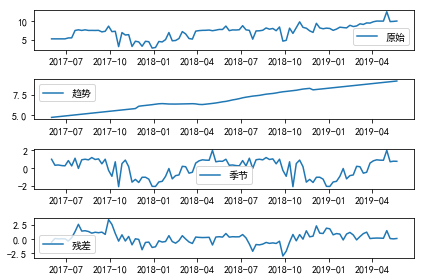

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,extrapolate_trend='freq')
# 显式调用seasonal_decompose函数的extrapolate_trend参数可以强制提取残差，同时使趋势曲线更加平滑
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='原始')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='趋势')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='季节')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='残差')
plt.legend(loc='best')
plt.tight_layout()

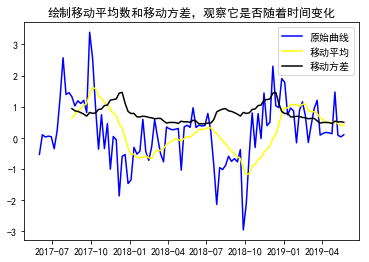

单位根检验:
Test Statistic                 -3.979610
p-value                         0.001521
#Lags Used                     12.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
p值小于0.01，拒绝原假设，说明时间序列是平稳的


True

In [29]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

## 利用交叉验证法求预测模型参数

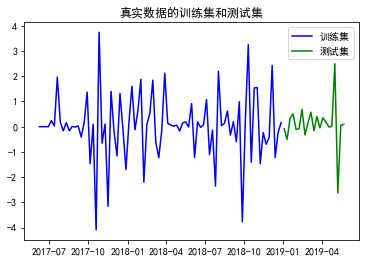

In [30]:
# 创建训练集和测试集
size = int(len(ts_diff) * 0.8)
train, test = ts_diff[0:size], ts_diff[size:len(ts_diff)]
register_matplotlib_converters()
plt.plot(train.index, train, color='blue', label='训练集')
plt.plot(test.index, test, color='green', label='测试集')
plt.legend()
plt.title('真实数据的训练集和测试集')
plt.show()

In [31]:
#样本内预测的结果和预测误差
def compare_ARIMA_modes_testing(order):
    history = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0][0]
        yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history.append(test[t])
    #mean_squared_error即为“误差”的平方的期望值
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': pd.Series(predictions_f,index=test.index),
            'Predictions predict': pd.Series(predictions_p,index=test.index),
            'MSE forecast': error_f,
            'MSE predict': error_p}

In [32]:
#利用交叉验证法寻找最佳阶数
def cross_proper_model(maxLag):
    init_error = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            arima = compare_ARIMA_modes_testing((p,1,q))
            error_f = arima['MSE forecast']
            error_p = arima['MSE predict']
        if error_f < init_error or error_p < init_error:
                init_p = p
                init_q = q
                init_properModel =arima
                init_error = min(error_f,error_p)
    return [init_error, init_p, init_q, init_properModel]

## 利用贝叶斯信息准则求预测模型参数

In [33]:
#利用贝叶斯信息准则（BIC）寻找最佳阶数，使得BIC达到最小值的(p, q)即为该准则下的最优模型的阶数
def proper_model(data_ts, maxLag):
    init_bic = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q),freq=data_ts.index.inferred_freq)
            try:
                results_ARMA = model.fit(disp=-1, method='css')
            except:
                continue#忽略所有异常
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return [init_bic, init_p, init_q, init_properModel]

## 预测模型（针对趋势和残差）

In [34]:
#样本外预测
def compare_ARIMA_modes(series,order):
    history_f = [x for x in series]
    history_p = [x for x in series]
    series_p = series
    series_f = series
#     for t in range(52):滚动预测的效果不佳
    model = ARIMA(history_f, order=order)
    model_fit = model.fit(disp=-1)
    yhat_f = model_fit.forecast(steps=52)[0]
    model = ARIMA(history_p, order=order)
    model_fit = model.fit(disp=-1)
    yhat_p = model_fit.predict(start=len(history_p), end=len(history_p)+52)
    
    #附加新元素时也加上一个单位的索引
    for t in range(52,1,-1):
        series_p = series_p.append(pd.Series(yhat_p[-t],index=[series_p.index[-1]+timedelta(days=7)]))
        series_f = series_f.append(pd.Series(yhat_f[-t],index=[series_f.index[-1]+timedelta(days=7)]))
    return {'Predictions forecast': series_f[series.index[-1]:series_f.index[-1]],
            'Predictions predict': series_p[series.index[-1]:series_p.index[-1]]}

In [35]:
#季节变动每一年都是一样的，预测季节因素只需要将前一年的数据复制到新一年即可
def season_forcast_year(seasonal):
    seasonal_f = seasonal[-53:-1]
    seasonal_f.index = seasonal.index[-53:-1]+timedelta(weeks=52)
    return seasonal_f

In [36]:
trend.dropna(inplace=True)
ar = compare_ARIMA_modes(trend,(1, 0, 0))
ma = compare_ARIMA_modes(trend,(0, 1, 0))
# ig = compare_ARIMA_modes(seasonal,(0, 0, 1))
arma = compare_ARIMA_modes(trend,(1, 1, 0))
# igma = compare_ARIMA_modes(seasonal,(0, 1, 1))
# arig = compare_ARIMA_modes(seasonal,(1, 0, 1))

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


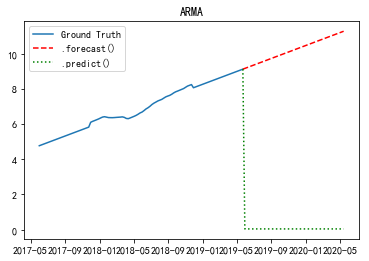

In [37]:
# forecast and predict are different for ARMA
plt.plot(trend, label='Ground Truth')
plt.plot(arma['Predictions forecast'], color='red', label='.forecast()',linestyle='dashed')
plt.plot(arma['Predictions predict'], color='green', label='.predict()',linestyle='dotted')
plt.legend(loc='best')
plt.title('ARMA')
plt.show()

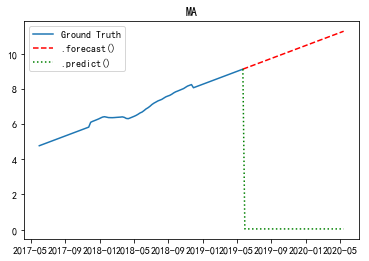

In [38]:
# forecast and predict are different for MA
plt.plot(trend, label='Ground Truth')
plt.plot(ma['Predictions forecast'], color='red', label='.forecast()',linestyle='dashed')
plt.plot(ma['Predictions predict'], color='green', label='.predict()',linestyle='dotted')
plt.legend(loc='best')
plt.title('MA')
plt.show()

In [39]:
residual_coefficient=proper_model(residual,20)
print(residual_coefficient)

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[249.26403435877822, 18, 8, <statsmodels.tsa.arima_model.ARMAResultsWrapper object at 0x00000280F8C05710>]


In [40]:
residual_model =  compare_ARIMA_modes(residual,(residual_coefficient[1], 1, residual_coefficient[2]))

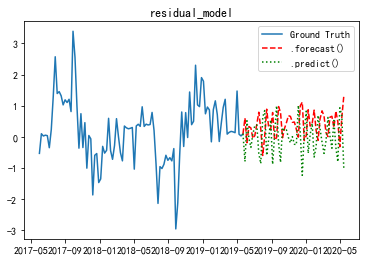

In [41]:
plt.plot(residual, label='Ground Truth')
plt.plot(residual_model['Predictions forecast'], color='red', label='.forecast()',linestyle='dashed')
plt.plot(residual_model['Predictions predict'], color='green', label='.predict()',linestyle='dotted')
plt.legend(loc='best')
plt.title('residual_model')
plt.show(block=False)

In [42]:
seasonal_f=season_forcast_year(seasonal)

In [43]:
forcast_model = arma['Predictions forecast']+residual_model['Predictions forecast']+seasonal_f
forcast_model.head()

2019-05-23     9.992000
2019-05-30    10.769933
2019-06-06     9.350318
2019-06-13     9.942332
2019-06-20     9.869850
dtype: float64

# 预测

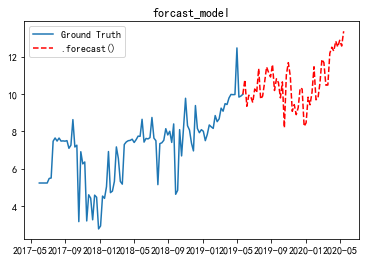

In [44]:
plt.plot(ts, label='Ground Truth')
plt.plot(forcast_model, color='red', label='.forecast()',linestyle='dashed')
plt.legend(loc='best')
plt.title('forcast_model')
plt.show()

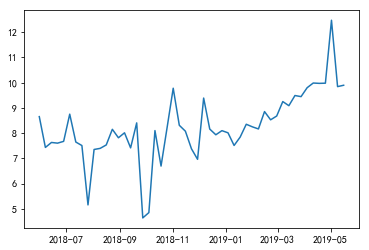

In [45]:
plt.plot(ts[-52:-1])

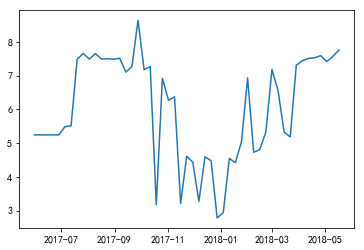

In [46]:
plt.plot(ts[-104:-53])

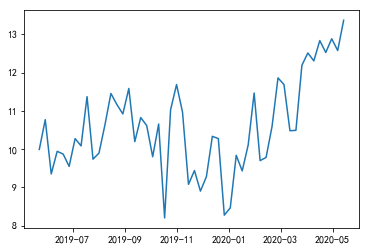

In [47]:
plt.plot(forcast_model)

# 预测时间序列

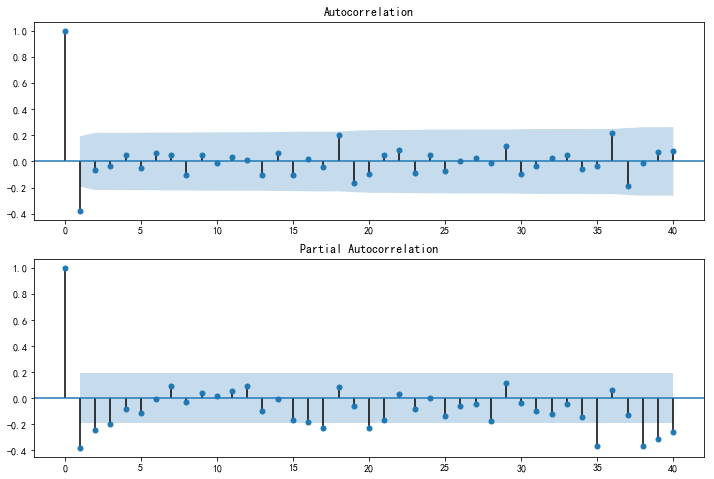

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff, lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff, lags=40, ax=ax2)

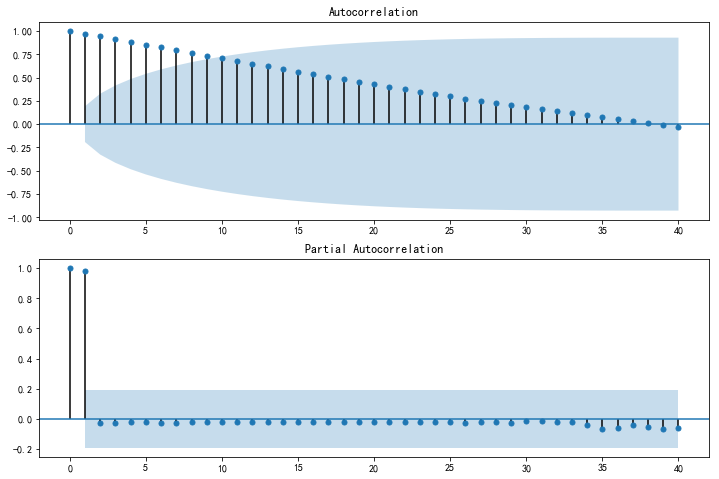

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend.dropna(), lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend.dropna(), lags=40, ax=ax2)

### ACF & PACF Plots

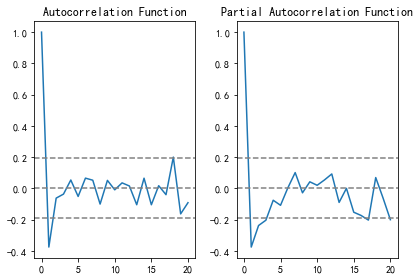

In [50]:
#选择差分处理后的结果进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

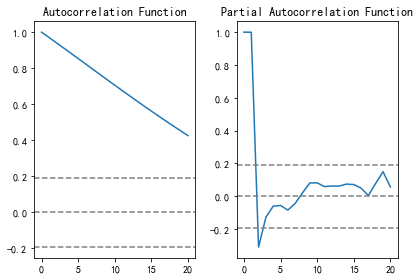

In [51]:
#选择季节分解后的趋势进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(trend.dropna(), nlags=20)
lag_pacf = pacf(trend.dropna(), nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

### AR Model:

In [52]:
#MA model:
model = ARIMA(ts_log, order=(1, 1, 2),freq=ts_log.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

NameError: name 'ts_log' is not defined

### MA Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2),freq=ts_log.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2),freq=ts_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### 预测还原:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_diff_cumsum)

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)
predictions_ARIMA_log=predictions_ARIMA_log.rename('predictions_ARIMA_log')
predictions_ARIMA_log.to_csv(predictions_ARIMA_log.name+'.csv',header=True)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### 对分解出来的趋势进行预测